In [19]:
import pandas as pd

df = pd.read_csv(r"long_run_varying_flows_labelled.csv")

# Drop non-numeric / non-useful columns
drop_cols = ["Timestamp_IST", "State"]
df = df.drop(columns=drop_cols)
seconds = df["Seconds"].values
df = df.drop(columns=["Seconds"])

print(df.shape)
print(df["label"].value_counts())


(86400, 47)
label
no_fault    66240
2pct0        2880
4pct0        2880
2pct130      2880
4pct130      2880
2pct250      2880
4pct250      2880
10pct0       2880
Name: count, dtype: int64


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])

X = df.drop(columns=["label", "label_encoded"])
y = df["label_encoded"]

print(le.classes_)


['10pct0' '2pct0' '2pct130' '2pct250' '4pct0' '4pct130' '4pct250'
 'no_fault']


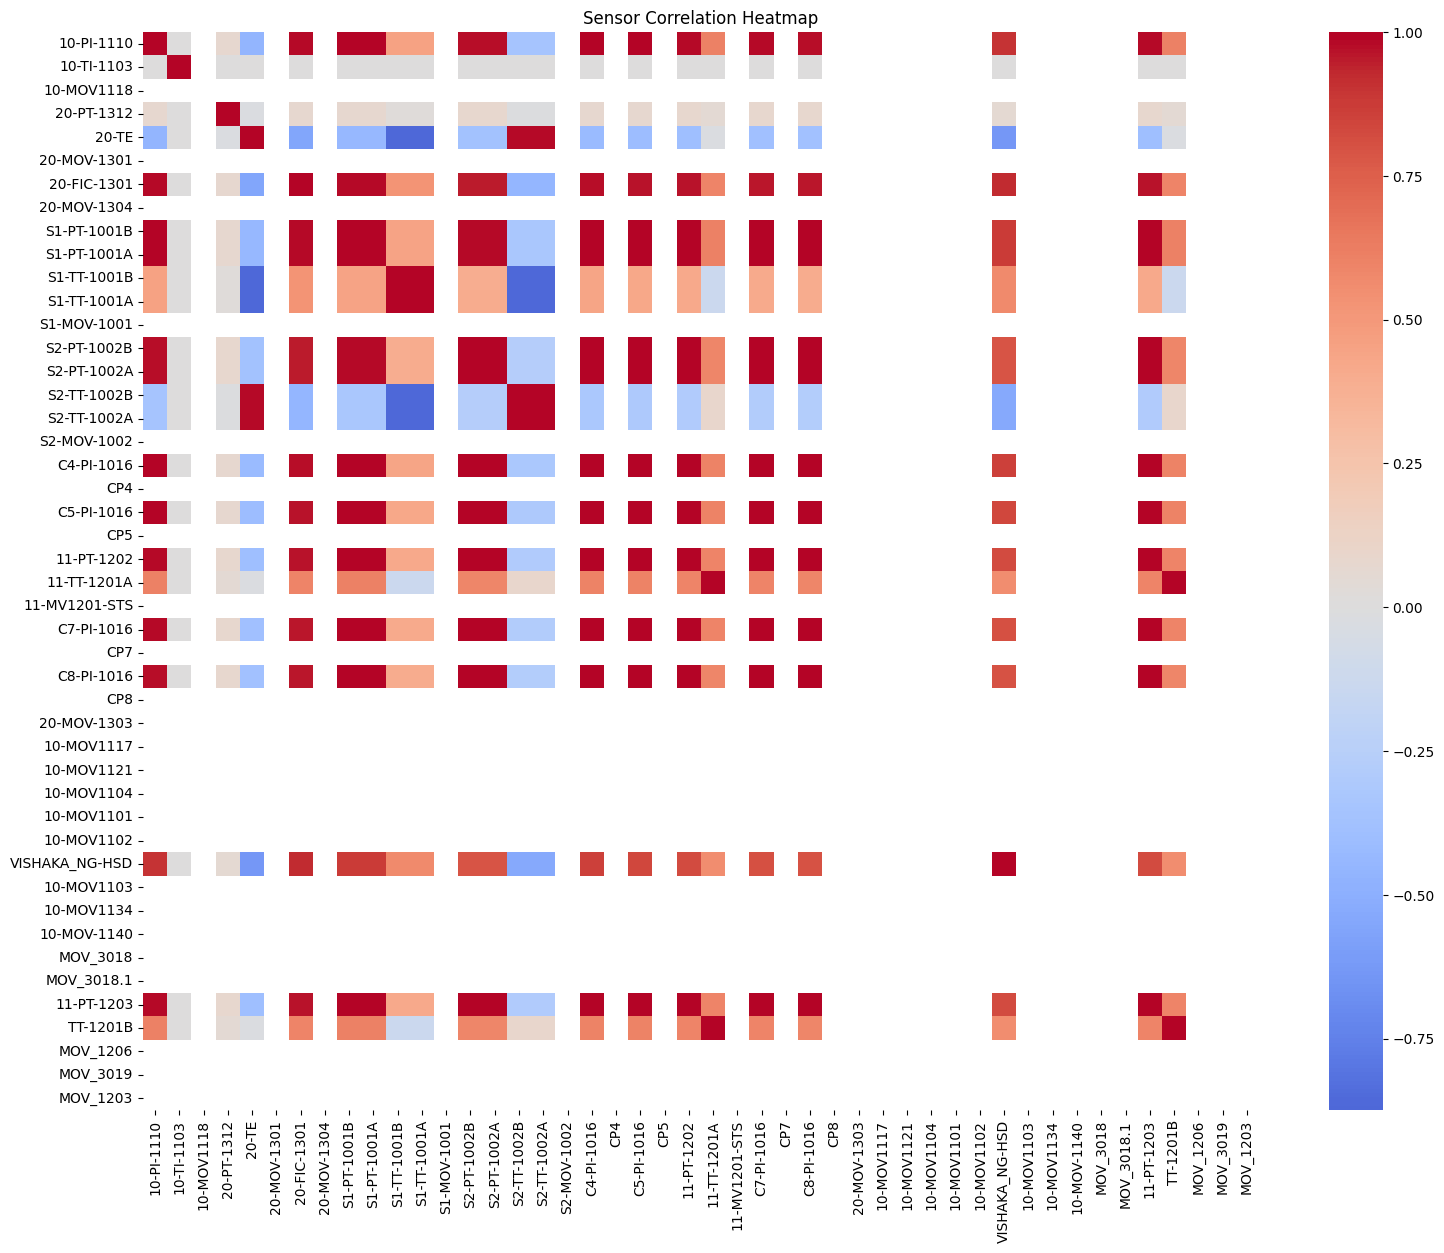

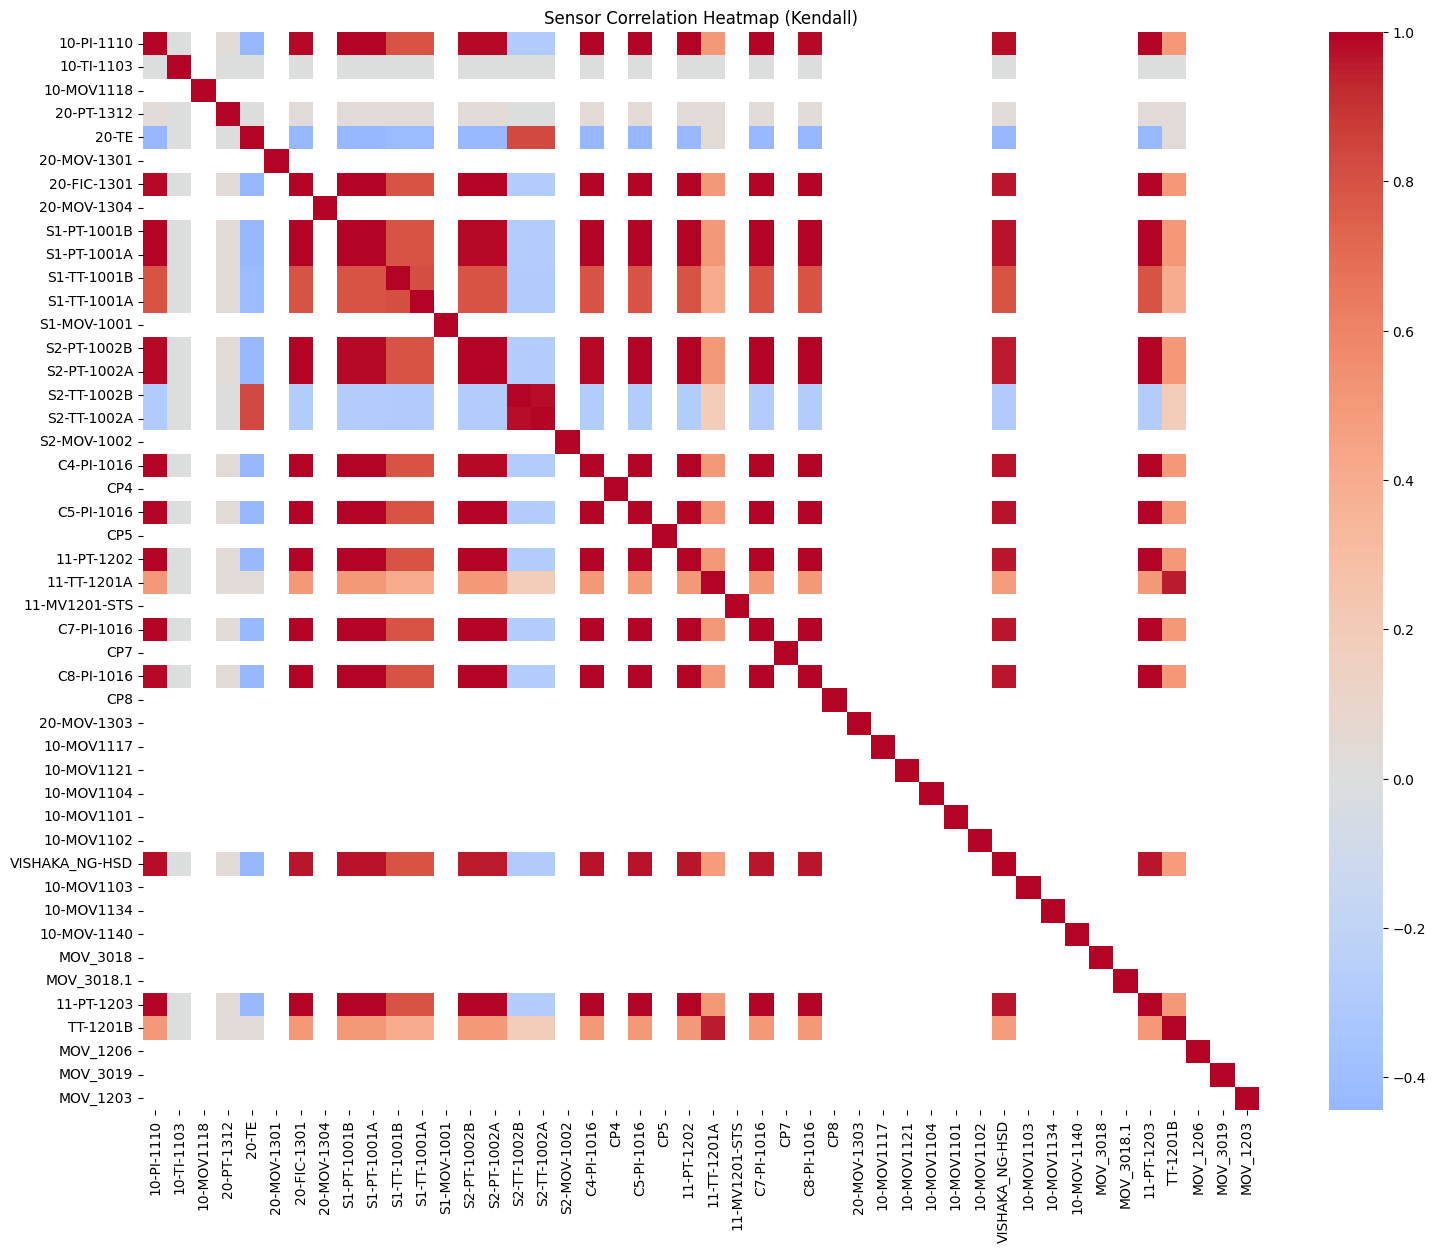

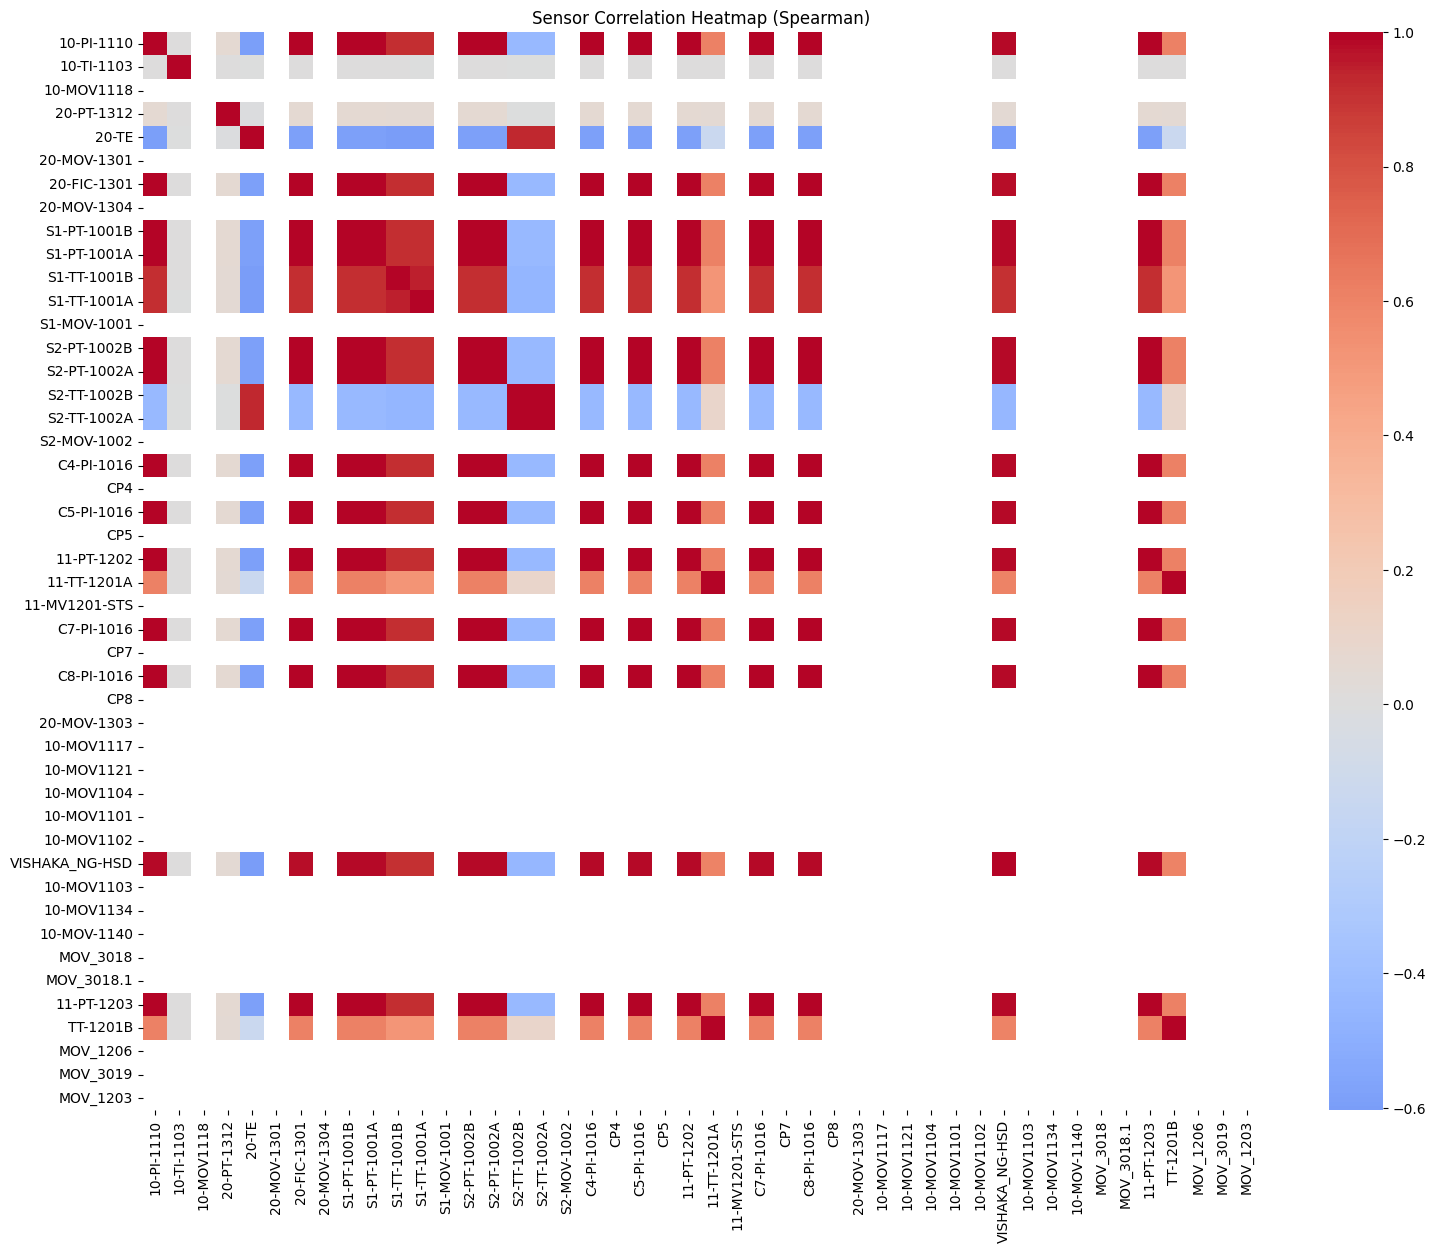

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr(method="pearson")
corr_ken = X.corr(method="kendall")
corr_spearman = X.corr(method="spearman")

plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Sensor Correlation Heatmap")
plt.show()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_ken, cmap="coolwarm", center=0)
plt.title("Sensor Correlation Heatmap (Kendall)")
plt.show()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_spearman, cmap="coolwarm", center=0)
plt.title("Sensor Correlation Heatmap (Spearman)")
plt.show()


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

clf = LogisticRegression(
    max_iter=2000,
    n_jobs=-1,
    multi_class="auto"
)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred, target_names=le.classes_))


c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

      10pct0       0.94      0.98      0.96       576
       2pct0       0.98      0.99      0.98       576
     2pct130       0.94      1.00      0.97       576
     2pct250       0.94      1.00      0.97       576
       4pct0       0.99      0.99      0.99       576
     4pct130       0.96      0.99      0.98       576
     4pct250       0.97      1.00      0.98       576
    no_fault       1.00      0.99      0.99     13248

    accuracy                           0.99     17280
   macro avg       0.97      0.99      0.98     17280
weighted avg       0.99      0.99      0.99     17280



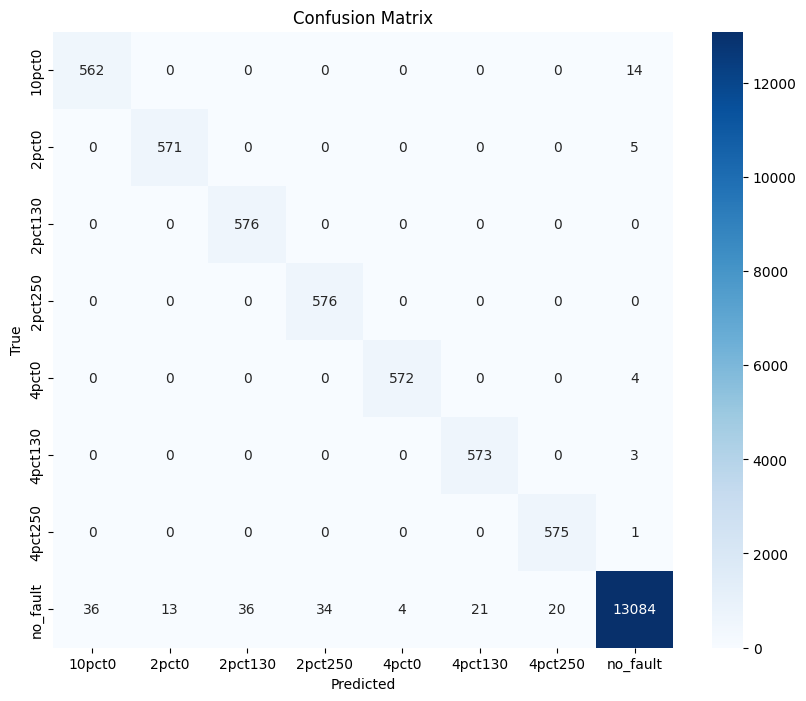

In [26]:
import numpy as np
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=le.classes_,
    yticklabels=le.classes_,
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


              precision    recall  f1-score   support

      10pct0       1.00      1.00      1.00       576
       2pct0       1.00      1.00      1.00       576
     2pct130       1.00      1.00      1.00       576
     2pct250       1.00      1.00      1.00       576
       4pct0       1.00      1.00      1.00       576
     4pct130       1.00      1.00      1.00       576
     4pct250       1.00      1.00      1.00       576
    no_fault       1.00      1.00      1.00     13248

    accuracy                           1.00     17280
   macro avg       1.00      1.00      1.00     17280
weighted avg       1.00      1.00      1.00     17280



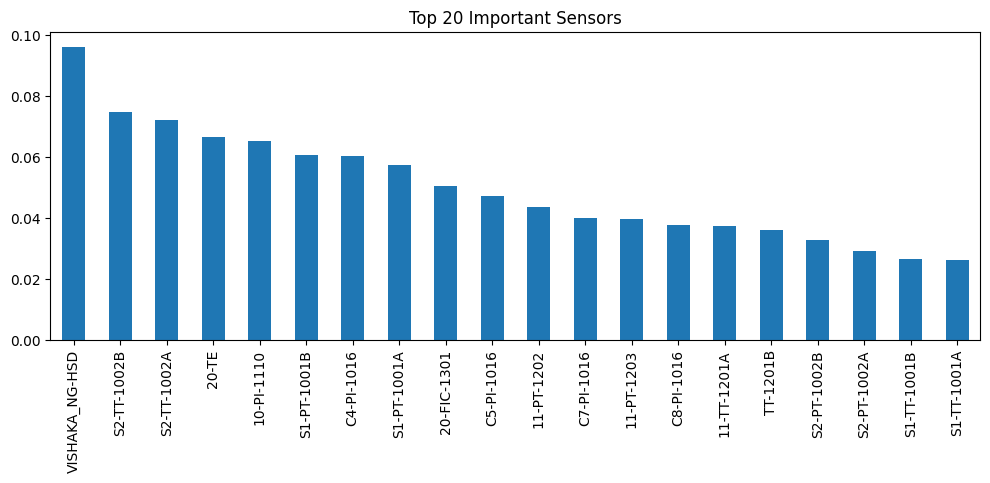

In [28]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns)
feat_imp = feat_imp.sort_values(ascending=False)

feat_imp.head(20).plot(kind="bar", figsize=(12,4))
plt.title("Top 20 Important Sensors")
plt.show()
